In [10]:
_ = """
import numpy as np
import cv2
import matplotlib.pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
HandLandmarkerResult = mp.tasks.vision.HandLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the live stream mode:
def print_result(
    result: HandLandmarkerResult,
    output_image: mp.Image,
    timestamp_ms: int
):
    print('hand landmarker result: {}'.format(result))

options = HandLandmarkerOptions(
    base_options    = BaseOptions(model_asset_path='/home/hjp/HJP/KUAICV/Hand/AbsoluteTrack/agora/hand_landmarker.task'),
    running_mode    = VisionRunningMode.LIVE_STREAM,
    result_callback = print_result,
)

with HandLandmarker.create_from_options(options) as landmarker:
  # The landmarker is initialized. Use it here.
  # ...

"""

# Mediapipe API
- It seems that mediapipe API has various forms
- I refered to  [this document](https://mediapipe.readthedocs.io/en/latest/solutions/hands.html)


In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

def open_stereo_camera(IMAGE_WIDTH, IMAGE_HEIGHT, CAM_ID_MAX = 10) :
    for CAM_ID in range(-1, CAM_ID_MAX) :
        cap = cv2.VideoCapture(CAM_ID)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH * 2)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)
        if cap.isOpened() :
            print(f"Camera ID {CAM_ID} Frame Width {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
            return cap

IMG_SETTING_OPTIONS = {
    "0": (1920, 1080),
    "1": (1280, 720),
    "2": (640, 480),
}
IMAGE_SETTING = "2"

IMAGE_WIDTH, IMAGE_HEIGHT = IMG_SETTING_OPTIONS[IMAGE_SETTING]

CAM_ID_MAX = 10

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands = 2,
    
    model_complexity = 1,
    min_detection_confidence = 0.5, 
    min_tracking_confidence = 0.5
)

I0000 00:00:1724482100.542162   28361 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1724482100.629109   28405 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.06), renderer: NVIDIA GeForce RTX 3060/PCIe/SSE2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1724482100.640660   28393 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724482100.658871   28394 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Camera ID -1 Frame Width 1280.0


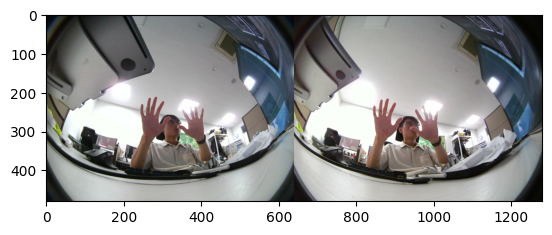

[classification {
   index: 1
   score: 0.799356222
   label: "Right"
 },
 classification {
   index: 0
   score: 0.965694308
   label: "Left"
 }]

In [24]:
cap = open_stereo_camera(IMAGE_WIDTH, IMAGE_HEIGHT, CAM_ID_MAX)
ret, frame_stereo = cap.read()
frame_stereo = cv2.cvtColor(frame_stereo, cv2.COLOR_BGR2RGB)
frame_left = frame_stereo[:, :IMAGE_WIDTH]
frame_right = frame_stereo[:, IMAGE_WIDTH:]

cap.release()

result = hands.process(frame_left)
result.multi_handedness

plt.imshow(frame_stereo)
plt.show()

Camera ID -1 Frame Width 1280.0


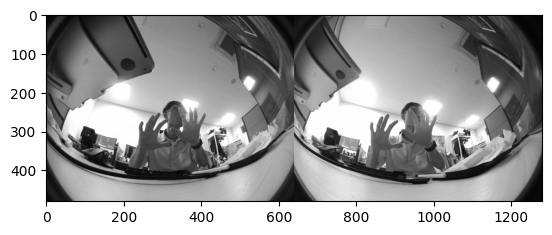

In [21]:
cap = open_stereo_camera(IMAGE_WIDTH, IMAGE_HEIGHT, CAM_ID_MAX)
ret, frame_stereo = cap.read()
frame_stereo = cv2.cvtColor(frame_stereo, cv2.COLOR_BGR2RGB)
frame_stereo = cv2.cvtColor(frame_stereo, cv2.COLOR_RGB2GRAY)
frame_stereo = cv2.cvtColor(frame_stereo, cv2.COLOR_GRAY2RGB)
frame_left = frame_stereo[:, :IMAGE_WIDTH]
frame_right = frame_stereo[:, IMAGE_WIDTH:]
plt.imshow(frame_stereo)
plt.show()

cap.release()

result = hands.process(frame_left)
print(result.multi_handedness)

In [30]:
result.multi_hand_landmarks[0].landmark

x: 0.616717
y: 0.649843395
z: 1.11678595e-07

In [33]:
np.array(list(map(
    lambda l : [l.x, l.y, l.z],
    result.multi_hand_landmarks[0].landmark
)))

array([[ 6.16716981e-01,  6.49843395e-01,  1.11678595e-07],
       [ 5.91090858e-01,  6.47724211e-01, -1.04909539e-02],
       [ 5.68351805e-01,  6.27506316e-01, -1.50663881e-02],
       [ 5.52168012e-01,  6.07570708e-01, -1.85424909e-02],
       [ 5.36429048e-01,  6.00108206e-01, -2.17395984e-02],
       [ 5.80981314e-01,  5.75267613e-01, -7.01818150e-03],
       [ 5.67790091e-01,  5.46381116e-01, -1.27626313e-02],
       [ 5.59535980e-01,  5.28569937e-01, -1.82444137e-02],
       [ 5.52816033e-01,  5.13137579e-01, -2.26438474e-02],
       [ 5.95641255e-01,  5.66053033e-01, -7.16479309e-03],
       [ 5.88709056e-01,  5.32599151e-01, -1.18576372e-02],
       [ 5.85319042e-01,  5.12352049e-01, -1.63310450e-02],
       [ 5.83169758e-01,  4.95601773e-01, -1.98267009e-02],
       [ 6.10020816e-01,  5.65181732e-01, -8.93638376e-03],
       [ 6.06586635e-01,  5.31716108e-01, -1.54393688e-02],
       [ 6.04956269e-01,  5.12673259e-01, -1.96272861e-02],
       [ 6.03220761e-01,  4.96018767e-01

In [25]:
result.__dict__

mappingproxy({'__doc__': 'SolutionOutputs(multi_hand_landmarks, multi_hand_world_landmarks, multi_handedness)',
              '__slots__': (),
              '_fields': ('multi_hand_landmarks',
               'multi_hand_world_landmarks',
               'multi_handedness'),
              '_field_defaults': {},
              '__new__': <staticmethod at 0x703895790c10>,
              '_make': <classmethod at 0x70389575ef40>,
              '_replace': <function collections.SolutionOutputs._replace(self, /, **kwds)>,
              '__repr__': <function collections.SolutionOutputs.__repr__(self)>,
              '_asdict': <function collections.SolutionOutputs._asdict(self)>,
              '__getnewargs__': <function collections.SolutionOutputs.__getnewargs__(self)>,
              'multi_hand_landmarks': [landmark {
                 x: 0.616717
                 y: 0.649843395
                 z: 1.11678595e-07
               }
               landmark {
                 x: 0.591090858
        